Importez le dataframe suivant et compléter les tâches : 
https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv
1. Affichez le top 10 des villes où l’on voit le plus d’OVNIS en excluant New York  


In [1]:
import pandas as pd

In [6]:
df_ovnis = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv")
df_ovnis.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
df_ovnis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [8]:
df_ovnis.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [9]:
!pip install missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [10]:
import missingno as mno

<AxesSubplot:>

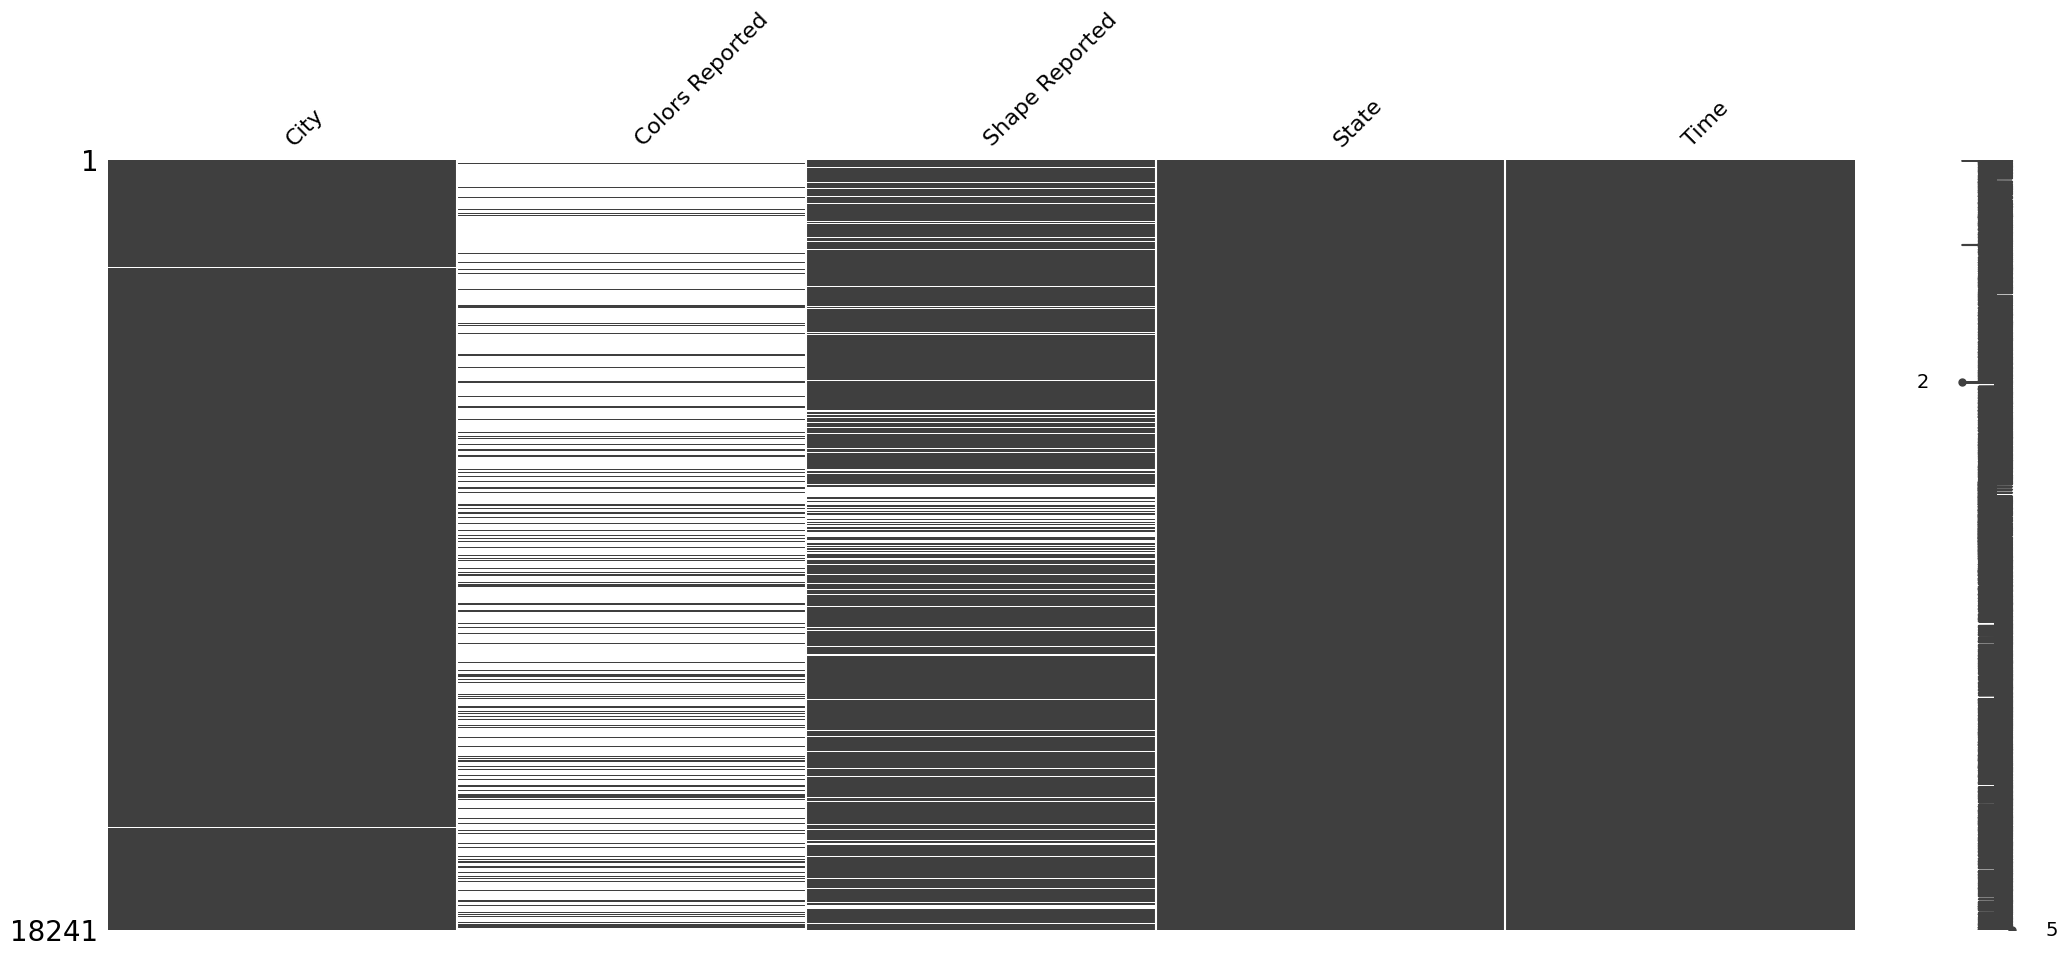

In [14]:
mno.matrix(df_ovnis)

In [15]:
df_ovnis['Colors Reported'].value_counts()

RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
ORANGE GREEN BLUE           5
YELLOW GREEN BLUE           5
RED ORANGE YELLOW           4
RED YELLOW GREEN BLUE       4
RED ORANGE BLUE             3
RED YELLOW BLUE             3
RED ORANGE GREEN            3
ORANGE YELLOW GREEN         1
ORANGE YELLOW BLUE          1
RED ORANGE YELLOW BLUE      1
Name: Colors Reported, dtype: int64

In [16]:
df_ovnis['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [41]:
# Affichez le top 10 des villes où l’on voit le plus d’OVNIS en excluant New York
# df_ovnis["City"].str.contains("New York")
df_without_NY = df_ovnis[df_ovnis["City"] != "New York"]
df_without_NY = df_ovnis[df_ovnis["City"] != "New York City"]

# df_ovnis["City"].isin(["New York"]).value_counts()

In [51]:
df_without_NY_2 = df_ovnis[df_ovnis["City"].str.contains("New York") == False]
df_without_NY_2

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [54]:
df_without_NY_2["City"].str.contains("New York").value_counts()

False    18044
Name: City, dtype: int64

In [61]:
df_top10 = df_without_NY_2.groupby(["City"], as_index=False).count().sort_values(by="State",ascending = False)

In [62]:
df_top10 = df_top10.head(10)

In [63]:
df_top10

,City,Colors Reported,Shape Reported,State,Time
5148,Seattle,41,121,187,187
4509,Phoenix,16,113,137,137
2597,Houston,15,101,108,108
3133,Las Vegas,17,83,105,105
4654,Portland,20,73,102,102
5021,San Diego,26,90,101,101
3302,Los Angeles,11,84,98,98
991,Chicago,10,67,73,73
236,Austin,9,53,62,62
3619,Miami,7,52,60,60


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe5582f2-aaf4-4c4b-afc2-44df05c82ae3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>